### Multi Layer Perceptron Regression 
This will use the mulit layer perceptron regression to construct a model on a training set, then perform analysis on the test data for performance evaluation.
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Optimize alpha

DXG - 2021-09-25

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix

In [2]:
# User defined function for accuracy
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [3]:
# Load dataset
#dataset = pd.read_csv('../featureSelectedDataset.csv')  
dataset = pd.read_csv('../LassoRegression/LassoForwardSelectionDataSetForModelling.csv')  
dataset.head()

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Cereal yield (kg per hectare),Urban population (% of total),GDP per capita (current US$),"Merchandise exports by the reporting economy, residual (% of total merchandise exports)",Permanent cropland (% of land area),"Merchandise imports by the reporting economy, residual (% of total merchandise imports)",Population density (people per sq. km of land area),Agricultural land (% of land area),Arable land (hectares per person),Arable land (% of land area),CO2 emissions from solid fuel consumption (kt),Merchandise trade (% of GDP),"Life expectancy at birth, total (years)",Year,CountryName,MeanLifeExpetancyOverall,MeanLifeExpetancyForYear,AboveAverageLifeExpectancyOverall,AboveAverageLifeExpectancyByYear
0,145.3210,1082.838,9.426,82.231395,44.252874,0.111816,57.122507,14.901579,58.010906,0.801756,11.947431,300.694,23.499999,34.092878,1964,Afghanistan,64.193563,55.937218,False,False
1,46.6478,1323.715,83.110,2127.165739,9.663118,0.021999,2.713909,1.453601,61.050597,3.168264,4.605392,67190.441,26.822615,70.880976,1964,Australia,64.193563,55.937218,True,True
2,56.3066,2621.710,64.962,1269.412583,11.543540,0.811334,8.977475,87.476399,48.244127,0.229381,20.065391,18951.056,36.085123,69.921951,1964,Austria,64.193563,55.937218,True,True
3,88.5072,529.302,11.801,104.323759,1.526718,0.709471,9.385113,22.936875,13.320326,0.378911,8.691025,0.000,16.410000,39.136854,1964,Benin,64.193563,55.937218,False,False
4,100.5586,795.060,37.957,203.601251,2.370500,0.126465,3.692906,3.683980,27.580541,0.336018,1.237884,3.667,24.452858,43.430220,1964,Bolivia,64.193563,55.937218,False,False


In [4]:
# Split the dataset into features and obs

forwardSelectionFeatures = pd.read_csv('../LassoRegression/ForwardSelectionVia5FoldCV.csv')["0"].tolist()
X = dataset[np.intersect1d(dataset.columns, forwardSelectionFeatures)]

#X = dataset.iloc[:,0:10]
y = dataset["Life expectancy at birth, total (years)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# Fit the model and get accuracy
clf = MLPRegressor(solver='adam', activation='logistic', alpha=1e-2, hidden_layer_sizes=(10,5), random_state=1, max_iter=20000)

mlp = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
print('Accuracy training : {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy testing : {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy training : 0.664
Accuracy testing : 0.674


In [7]:
residuals = y_pred-y_test
residuals
residuals.shape, X_test.shape

((2066,), (2066, 10))

In [8]:
X_test.iloc[:,0]

2304     47.2200
3621     38.4210
5821      9.9630
2707     32.1248
2596    106.6170
          ...   
3737     16.5984
679     147.3200
2955     22.6162
4041     96.3600
1211     52.2766
Name: Adolescent fertility rate (births per 1,000 women ages 15-19), Length: 2066, dtype: float64

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os


In [10]:
X_test.columns[0]


'Adolescent fertility rate (births per 1,000 women ages 15-19)'

In [11]:
def residual(x,y,title,folder):
    isExist = os.path.exists(folder)

    if not isExist:

      # Create a new directory because it does not exist 
      os.makedirs(folder)
    f = plt.figure()
    f = plt.scatter(x, y)
    plt.title(title)
    plt.savefig(folder + '/' + title + '.png', bbox_inches='tight', dpi=300)

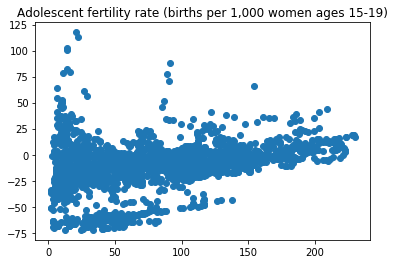

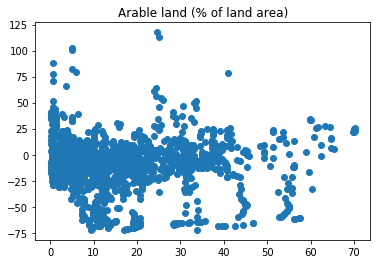

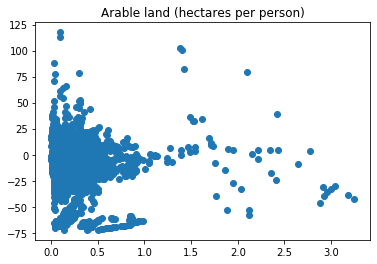

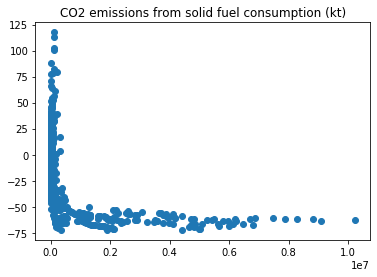

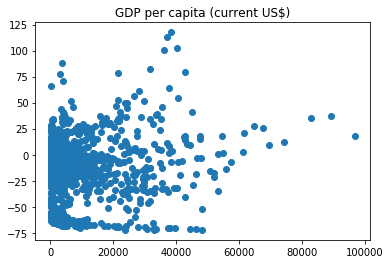

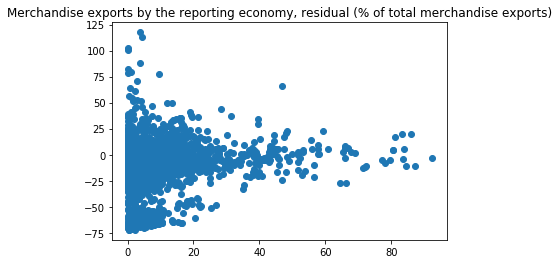

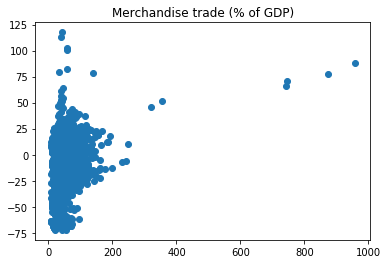

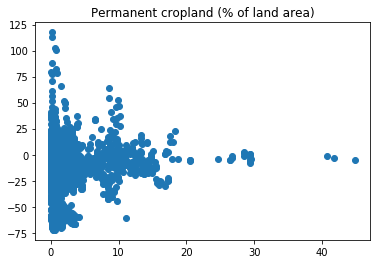

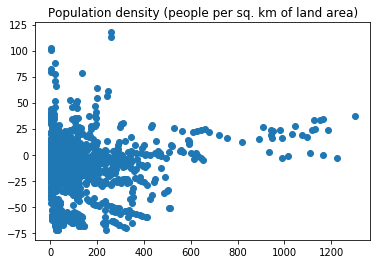

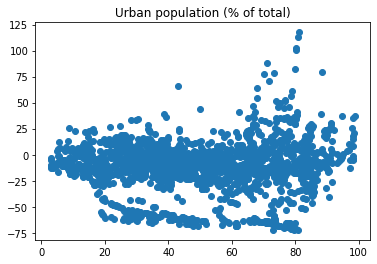

In [12]:
for index in range(0,10):
    residual(X_test.iloc[:,index], residuals,X_test.columns[index],'MLPRegression')